In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [2]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

In [3]:
train=pd.read_csv("C:/Users/shank/Downloads/Blood+Donation+Analysis/Blood Donation Analysis/blood-train.csv")
test=pd.read_csv("C:/Users/shank/Downloads/Blood+Donation+Analysis/Blood Donation Analysis/blood-test.csv")

In [5]:
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (576, 6)
Test Shape :  (200, 5)


In [6]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [7]:
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [8]:
Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [9]:
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [10]:
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [11]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [12]:
df=pd.merge(train,test)

In [14]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [15]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Made Donation in March 2007, Length: 576, dtype: int64

In [16]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

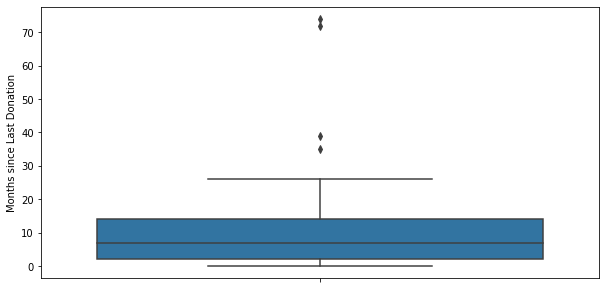

In [17]:
plt.figure(figsize=(10,5)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

<AxesSubplot:>

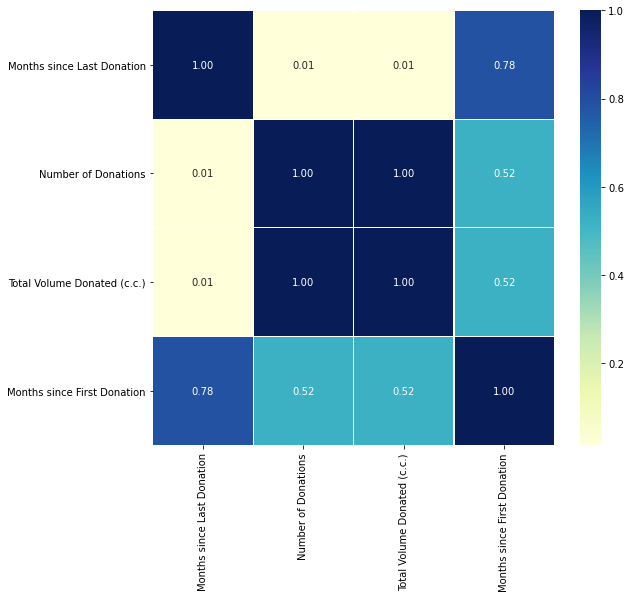

In [18]:
X=df.iloc[:,:]
X.head()
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [21]:
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

<AxesSubplot:>

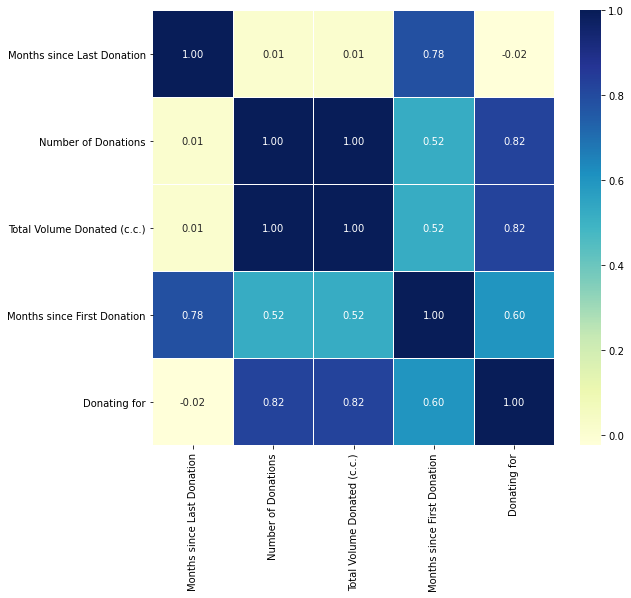

In [20]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [22]:
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [23]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [24]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [25]:
X=scale.fit_transform(X)

In [26]:
train=X[:576]

In [27]:
train.shape

(576, 4)

In [28]:
test=X[576:]

In [29]:
Y=Y[:576]

In [30]:
Y.shape

(576,)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

In [32]:
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [33]:
pred=logreg.predict(xtest)

In [34]:
accuracy_score(pred,ytest)

0.7155172413793104

In [35]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [36]:
SVMC = SVC(probability=True)
SVMC.fit(train,Y)

SVC(probability=True)

In [37]:
pred=SVMC.predict(xtest)

In [38]:
accuracy_score(pred, ytest)

0.7844827586206896

In [39]:
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [40]:
roc_auc_score(pred,ytest)

0.8429487179487177

In [42]:
RFC = RandomForestClassifier()
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
pred=RFC.predict(xtest)

In [44]:
confusion_matrix(pred,ytest)

array([[79, 27],
       [ 2,  8]], dtype=int64)

In [45]:
accuracy_score(pred, ytest)

0.75

In [46]:
roc_auc_score(pred,ytest)

0.7726415094339623

In [47]:
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [48]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [49]:
pred=model.predict(xtest)

In [50]:
accuracy_score(pred, ytest)

0.7327586206896551

In [51]:
confusion_matrix(pred,ytest)

array([[80, 30],
       [ 1,  5]], dtype=int64)

In [52]:
accuracy_score(pred,ytest)

0.7327586206896551

In [53]:
roc_auc_score(pred,ytest)

0.7803030303030304

In [54]:
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [55]:
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [56]:
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [57]:
roc_auc_score(pred,ytest)

0.7803030303030304

In [58]:
accuracy_score(pred, ytest)

0.7327586206896551